In [122]:
import tensorflow as tf

In [123]:
from tensorflow.examples.tutorials.mnist import input_data

In [125]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


MemoryError: 

In [ ]:
type(mnist)

In [ ]:
mnist.train.images

In [ ]:
mnist.train.images.shape

In [126]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [127]:
mnist.train.images[0].shape

(784,)

In [128]:
sample = mnist.train.images[5].reshape(28,28)

In [129]:
# these numbers are between 0-1 and show the darkness of each pixel

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

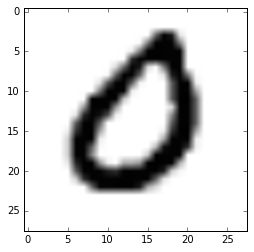

In [131]:
plt.imshow(sample, cmap='Greys')

In [132]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [133]:
n_classes = 10
n_samples = mnist.train.num_examples

In [134]:
n_input = 784

In [135]:
n_hidden_1 = 256
n_hidden_2 = 256

In [136]:
def multilayer_perceptron(x,weights,biases):
    '''
        x: placeholder for data input
        weights: dict of weights
        biases: dict of bias values
    
    '''
    
    # first Hidden Layer with RELU activation
    # x * W +B
    layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
    # RELU(x * W + B) = RELU   -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    #second hidden layer 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #last output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In [137]:
weights = {
    'h1' : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [178]:
weights

{'h1': <tf.Variable 'Variable_21:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_22:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_23:0' shape=(256, 10) dtype=float32_ref>}

In [159]:
biases = {
    'b1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'b2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [160]:
x = tf.placeholder('float',[None,n_input])

In [161]:
y = tf.placeholder('float', [None,n_classes])

In [162]:
pred = multilayer_perceptron(x,weights,biases)

In [163]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=pred))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [164]:
# training the model

In [165]:
t = mnist.train.next_batch(1)
len(t)


2

In [166]:
len(t[0])

1

In [167]:
xsamp, ysamp = t

In [168]:
xsamp

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [169]:
xsamp.reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

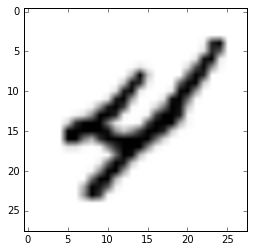

In [170]:
plt.imshow(xsamp.reshape(28,28), cmap='Greys')

In [171]:
ysamp

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [172]:
## run the session

In [173]:
sess = tf.InteractiveSession()

/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [174]:
init = tf.initialize_all_tables()

In [175]:
sess.run(init)

In [176]:
for epoch in range(training_epochs):
    
    #cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        
        _,c = sess.run([optimizer,cost], feed_dict={x:batch_x, y:batch_y})
        
        avg_cost += c/total_batch
        
    print("Epoch: {} cost{:.4f}".format(epoch+1,avg_cost))    

print("Model has completed {} Epochs of training".format(training_epochs))    

FailedPreconditionError: Attempting to use uninitialized value beta2_power_3
	 [[Node: beta2_power_3/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_21"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](beta2_power_3)]]

Caused by op 'beta2_power_3/read', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/moji/.local/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/moji/.local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/moji/.local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/moji/.local/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/usr/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/home/moji/.local/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/home/moji/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/moji/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/moji/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/moji/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/moji/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/moji/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/moji/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/moji/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/moji/.local/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/moji/.local/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/moji/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/moji/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/moji/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/moji/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-163-6a446cdde01a>", line 2, in <module>
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/optimizer.py", line 424, in minimize
    name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/optimizer.py", line 600, in apply_gradients
    self._create_slots(var_list)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/adam.py", line 127, in _create_slots
    colocate_with=first_var)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/optimizer.py", line 825, in _create_non_slot_variable
    v = variable_scope.variable(initial_value, name=name, trainable=False)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variable_scope.py", line 2220, in variable
    use_resource=use_resource)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variable_scope.py", line 2210, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variable_scope.py", line 2193, in default_variable_creator
    constraint=constraint)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variables.py", line 235, in __init__
    constraint=constraint)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variables.py", line 397, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/array_ops.py", line 142, in identity
    return gen_array_ops.identity(input, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 3187, in identity
    "Identity", input=input, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value beta2_power_3
	 [[Node: beta2_power_3/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_21"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](beta2_power_3)]]
